<a href="https://colab.research.google.com/github/gurusurya946/FML/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1091]:
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [1092]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1093]:
data = pd.read_csv("/content/drive/MyDrive/ML/Amazon.csv")

In [1094]:
data.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45


In [1095]:
data.isnull().sum()

Cus_ID    0
Sex       0
Age       0
Income    0
Rating    0
dtype: int64

In [1096]:
data.describe()

,Cus_ID,Age,Income,Rating
count,200.000000,200.000000,2.000000e+02,200.000000
mean,301318.500000,46.985000,1.237665e+06,56.705000
std,57.879185,16.751353,5.367721e+05,28.900418
min,301219.000000,22.000000,3.065550e+05,2.000000
25%,301268.750000,34.750000,8.481355e+05,39.750000
50%,301318.500000,44.000000,1.256876e+06,56.000000
75%,301368.250000,59.000000,1.594086e+06,82.000000
max,301418.000000,84.000000,2.799869e+06,111.000000


In [1097]:
data['Sex']=data['Sex'].replace('M',0)
data['Sex']=data['Sex'].replace('F',1)

In [1098]:
import seaborn as sns
corr=data.corr()
corr

,Cus_ID,Sex,Age,Income,Rating
Cus_ID,1.000000,-0.074324,-0.025057,0.977548,0.013574
Sex,-0.074324,1.000000,-0.061618,-0.074178,0.048073
Age,-0.025057,-0.061618,1.000000,-0.010866,-0.327837
Income,0.977548,-0.074178,-0.010866,1.000000,0.009533
Rating,0.013574,0.048073,-0.327837,0.009533,1.000000


<Axes: >

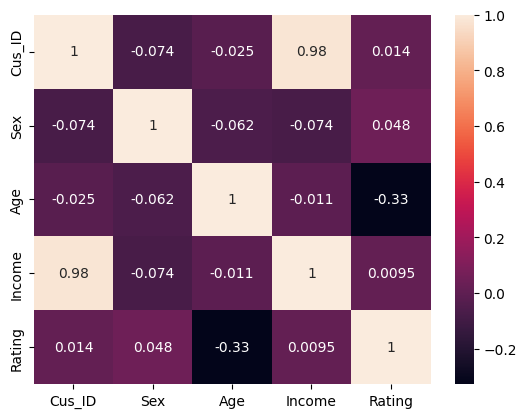

In [1099]:
sns.heatmap(corr,annot=True)

In [1100]:
scaler = StandardScaler()
features = [['Age', 'Income']]
for feature in features:
    data[feature] = scaler.fit_transform(data[feature])


In [1101]:
scaler = RobustScaler()
features = [['Age','Income']]
for feature in features:
    data[feature] = scaler.fit_transform(data[feature])

In [1102]:
X=data.drop('Rating',axis=1).values
y=data['Rating'].values
for i in range(0,len(y)):
  if(y[i]>80):
    y[i]=1
  else:
    y[i]=0
print(y)
     

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1]


In [1103]:
print(X)

[[ 3.01219000e+05  0.00000000e+00 -8.65979381e-01 -1.27397260e+00]
 [ 3.01220000e+05  1.00000000e+00 -7.42268041e-01 -1.27397260e+00]
 [ 3.01221000e+05  1.00000000e+00 -8.24742268e-01 -1.24657534e+00]
 [ 3.01222000e+05  0.00000000e+00 -6.59793814e-01 -1.24657534e+00]
 [ 3.01223000e+05  1.00000000e+00 -2.47422680e-01 -1.21917808e+00]
 [ 3.01224000e+05  1.00000000e+00 -7.01030928e-01 -1.21917808e+00]
 [ 3.01225000e+05  1.00000000e+00 -8.24742268e-02 -1.19178082e+00]
 [ 3.01226000e+05  1.00000000e+00 -6.59793814e-01 -1.19178082e+00]
 [ 3.01227000e+05  0.00000000e+00  1.36082474e+00 -1.16438356e+00]
 [ 3.01228000e+05  1.00000000e+00 -3.29896907e-01 -1.16438356e+00]
 [ 3.01229000e+05  0.00000000e+00  1.52577320e+00 -1.16438356e+00]
 [ 3.01230000e+05  1.00000000e+00 -8.24742268e-02 -1.16438356e+00]
 [ 3.01231000e+05  1.00000000e+00  1.07216495e+00 -1.13698630e+00]
 [ 3.01232000e+05  1.00000000e+00 -6.18556701e-01 -1.13698630e+00]
 [ 3.01233000e+05  0.00000000e+00  4.12371134e-02 -1.13698630e

In [1104]:
data.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219,0,-0.865979,-1.273973,0
1,301220,1,-0.742268,-1.273973,1
2,301221,1,-0.824742,-1.246575,0
3,301222,0,-0.659794,-1.246575,1
4,301223,1,-0.247423,-1.219178,0


In [1105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)

In [1106]:
X_train.shape, X_test.shape


((160, 4), (40, 4))

In [1107]:
y_train.shape, y_train.shape

((160,), (160,))

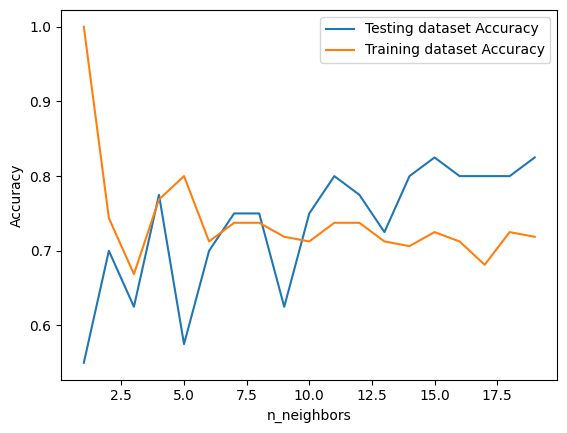

In [1108]:
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [1109]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [1110]:
y_pred = knn.predict(X_test)


In [1111]:
knn.score(X_train, y_train), knn.score(X_test, y_test)
     

(0.725, 0.825)

In [1112]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.825


In [1113]:
confusion_matrix(y_test, y_pred)

array([[32,  0],
       [ 7,  1]])

In [1114]:
print(classification_report(y_test, y_pred))
     

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.12      0.22         8

    accuracy                           0.82        40
   macro avg       0.91      0.56      0.56        40
weighted avg       0.86      0.82      0.77        40

